### Plots y visualización de los datos

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv("./datasets/customer-churn-model/Customer Churn Model.txt")

In [4]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
%matplotlib inline
#Para que el plot quede en la celda

In [ ]:
#guardar un plot("path_donde_guardar_im.jpge")

### Scatter Plot

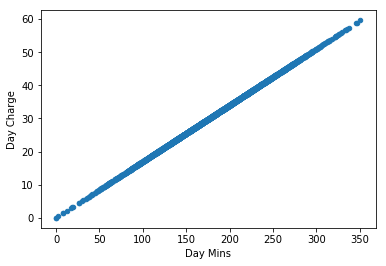

In [8]:
data.plot(kind="scatter",x="Day Mins",y="Day Charge")

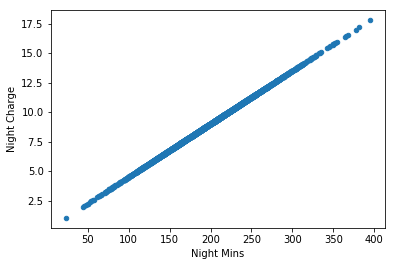

In [13]:
data.plot(kind="scatter",x="Night Mins",y="Night Charge")

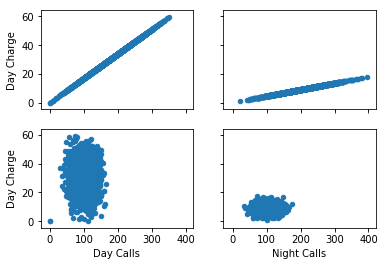

In [18]:
#Crear matris dos por dos con dos diagramas
figure,axs=plt.subplots(2,2,sharey=True,sharex=True)
data.plot(kind="scatter",x="Day Mins",y="Day Charge",ax=axs[0][0])
data.plot(kind="scatter",x="Night Mins",y="Night Charge",ax=axs[0][1])
data.plot(kind="scatter",x="Day Calls",y="Day Charge",ax=axs[1][0])
data.plot(kind="scatter",x="Night Calls",y="Night Charge",ax=axs[1][1])

###  Histograma de frecuencias

Podemos ver una vision de la distribucion de una variable

In [33]:
#Calculamos la regla de sturges
#La cual nos dice el el numero de diviciones que debe tener un histograma
number_sturges=int(np.ceil(1+np.log2(len(data))))

Text(0.5, 1.0, 'Histograma del numero de llamadas al día')

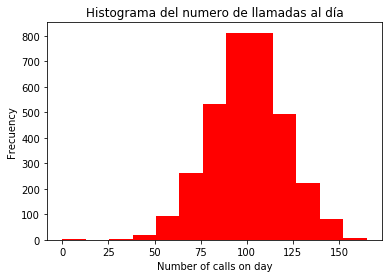

In [36]:
#bins indica la CANTIDAD DE ELEMENTOS, a dividir el histograma
plt.hist(data["Day Calls"],bins=number_sturges,color="red")
plt.xlabel("Number of calls on day")
plt.ylabel("Frecuency")
plt.title("Histograma del numero de llamadas al día")

### Boxplot ,diagrama de caja y bigotes

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

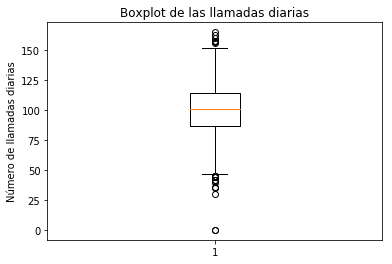

In [39]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

In [40]:
data["Day Calls"].describe()
#Miramos cuartiles y valores maximos valores
#IQR=Rango Intercuntil=Q3-Q1
#

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [42]:
IQR=data["Day Calls"].quantile(0.75)-data["Day Calls"].quantile(0.25) 
IQR

27.0

In [44]:
#Barreras para obtener outlier(Vallores fuera de lugar my atipicos las bolitas)
#Barrera inferior
#BI=Q1-1.5*IQR
BI=data["Day Calls"].quantile(0.25)-1.5*IQR
BI

46.5

In [45]:
#Barrera superior
#BS=Q3+1.5*IQR
BS=data["Day Calls"].quantile(0.75)+1.5*IQR
BS

154.5